In [4]:
from collections import Counter

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from preprocessing.corpus import build_corpus
from preprocessing.data_preparation import prepare_and_merge_datasets
from wordcloud import WordCloud

In [5]:
df_dataset = pd.read_csv("data/preprocessed/dataset.csv", index_col=0)
df_dataset.head()

,class,content
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,#2013Faves RT @grahamorama: #Snoop and #Justin...
2,0,"#AZmonsoon lot of rain, too bad it wasn't enou..."
3,1,#AskDems Aren't you embarrassed that Charlie R...
4,1,#BREAKING: AP calls Mass. Governor race for Ch...


In [6]:
hate_speech = build_corpus(df_dataset[df_dataset["class"] == 0])
non_hate_speech = build_corpus(df_dataset[df_dataset["class"] == 1])

/home/st/Dokumente/Studium/Master/Semester_1/Text_Analytics_Gertz/project/HateSpeechDetection/src/preprocessing/corpus.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["content"].str.lower().str.replace("[^a-zA-Z ]", "")
/home/st/Dokumente/Studium/Master/Semester_1/Text_Analytics_Gertz/project/HateSpeechDetection/src/preprocessing/corpus.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["all_tokens"] = dataframe["content"].apply(lambda cell: tokenize(cell))
/home/st/Dokumente/Stud

In [7]:
pd.set_option('display.max_colwidth', None)
hate_speech

,class,content,all_tokens,tokens_without_stopwords,cleaned_tokens,stems
2,0,azmonsoon lot of rain too bad it wasnt enough to wash away the teabagger racist white trash in the state tcot teaparty azflooding,"[azmonsoon, lot, of, rain, too, bad, it, was, nt, enough, to, wash, away, the, teabagger, racist, white, trash, in, the, state, tcot, teaparty, azflooding]","[azmonsoon, lot, rain, bad, nt, wash, away, teabagger, racist, white, trash, state, tcot, teaparty, azflooding]","[azmonsoon, lot, rain, bad, wash, away, teabagger, racist, white, trash, state, tcot, teaparty, azflooding]","[azmonsoon, lot, rain, bad, wash, away, teabagg, racist, white, trash, state, tcot, teaparti, azflood]"
11,0,california is full of white trash,"[california, is, full, of, white, trash]","[california, white, trash]","[california, white, trash]","[california, white, trash]"
12,0,california is full of white trash who moved from oklahoma,"[california, is, full, of, white, trash, who, moved, from, oklahoma]","[california, white, trash, moved, oklahoma]","[california, white, trash, moved, oklahoma]","[california, white, trash, move, oklahoma]"
14,0,dtla is trash because of noneuropeans are allowed to live there,"[dtla, is, trash, because, of, noneuropeans, are, allowed, to, live, there]","[dtla, trash, noneuropeans, allowed, live]","[dtla, trash, noneuropeans, allowed, live]","[dtla, trash, noneuropean, allow, live]"
17,0,dutch farmers are white trash,"[dutch, farmers, are, white, trash]","[dutch, farmers, white, trash]","[dutch, farmers, white, trash]","[dutch, farmer, white, trash]"
...,...,...,...,...,...,...
15789,0,and yes they will steal anything from whites because they think whites owe them something so it s ok to steal,"[and, yes, , they, will, steal, anything, from, whites, because, they, think, whites, owe, them, something, , so, it, s, ok, to, steal]","[yes, , steal, whites, think, whites, owe, , s, ok, steal]","[yes, steal, whites, think, whites, owe, steal]","[ye, steal, white, think, white, owe, steal]"
15790,0,i use it as way to intimidae jew to show them that there are still people who are aginst them it did originate in roman it was called the wariors salute,"[i, use, it, as, way, to, intimidae, jew, to, show, them, that, there, are, still, people, who, are, aginst, them, it, did, originate, in, roman, it, was, called, the, wariors, salute]","[use, way, intimidae, jew, people, aginst, originate, roman, called, wariors, salute]","[use, way, intimidae, jew, people, aginst, originate, roman, called, wariors, salute]","[use, way, intimida, jew, peopl, aginst, origin, roman, call, warior, salut]"
15811,0,i can only pray this babboon mongoloid did nt have any children so his seed will not continue on on this earth,"[i, can, only, pray, this, babboon, mongoloid, did, nt, have, any, children, so, his, seed, will, not, continue, on, on, this, earth]","[pray, babboon, mongoloid, nt, children, seed, continue, earth]","[pray, babboon, mongoloid, children, seed, continue, earth]","[pray, babboon, mongoloid, children, seed, continu, earth]"
15814,0,trudeau is the white obama as he does nt care about the people of canada but all the third world crap he s allowing into canada,"[trudeau, is, the, white, obama, as, he, does, nt, care, about, the, people, of, canada, but, all, the, third, world, crap, he, s, allowing, into, canada]","[trudeau, white, obama, nt, care, people, canada, world, crap, s, allowing, canada]","[trudeau, white, obama, care, people, canada, world, crap, allowing, canada]","[trudeau, white, obama, care, peopl, canada, world, crap, allow, canada]"


2490
13335


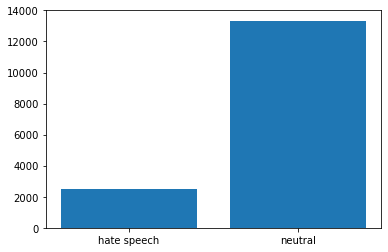

In [8]:
print(len(hate_speech))
print(len(non_hate_speech))

x = ["hate speech", "neutral"]
y = [len(hate_speech), len(non_hate_speech)]
plt.bar([1, 2], y)
plt.xticks([1, 2], x)
plt.savefig("distribution")

In [9]:
def generate_barchart(datacolumn, n=15, title="Bar chart"):
    counter = Counter(datacolumn.explode())
    n_most_common = counter.most_common(n)
    x = np.array(n_most_common).T[0]
    list_of_tuples = list(zip(*n_most_common))
    list_of_lists = [list(elem) for elem in list_of_tuples]
    plt.bar(np.array(list_of_lists[0]), np.array(list_of_lists[1]))
    plt.xticks(range(0, x.shape[0]), x, rotation='vertical')
    plt.title(title)
    plt.savefig(title.replace(" ", ""))
    plt.show()

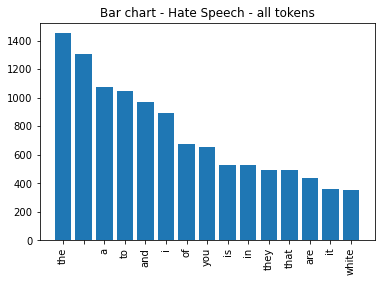

In [10]:
generate_barchart(hate_speech["all_tokens"], title="Bar chart - Hate Speech - all tokens")

In [11]:
def generate_wordcloud(datacolumn, n=15, title="Wordcloud"):
    counter = Counter(datacolumn.explode())
    n_most_common = counter.most_common(n)
    x = np.array(n_most_common).T[0]
    n_most_common_words_as_string = (" ").join(x)
    wordcloud = WordCloud(background_color="white", stopwords={}).generate(n_most_common_words_as_string)

    fig = plt.figure(1)
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.savefig(title.replace(" ", ""))
    plt.show()

In [12]:
def create_visualizations(dataset, name, n=15):
    generate_barchart(dataset["all_tokens"], title="Bar chart - " +  name + " - all tokens")
    generate_wordcloud(dataset["all_tokens"], title="Wordcloud - " +  name + " - all tokens")
    generate_barchart(dataset["cleaned_tokens"], title="Bar chart - " +  name + " - cleaned tokens")
    generate_wordcloud(dataset["cleaned_tokens"], title="Wordcloud - " +  name + " - cleaned tokens")
    generate_barchart(dataset["stems"], title="Bar chart - " +  name + " - stems")
    generate_wordcloud(dataset["stems"], title="Wordcloud - " +  name + " - stems")

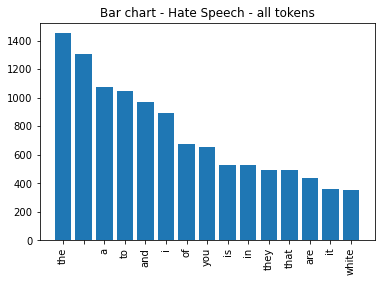

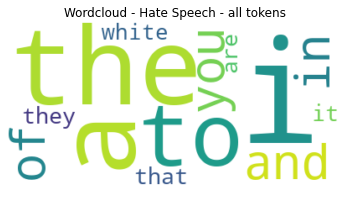

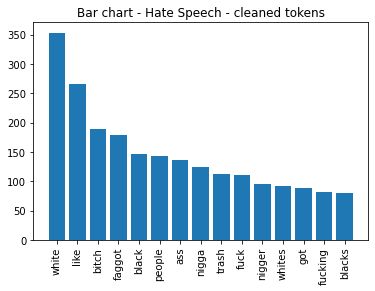

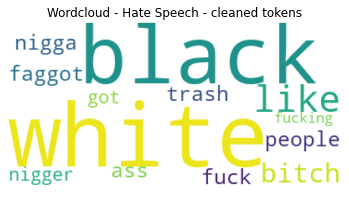

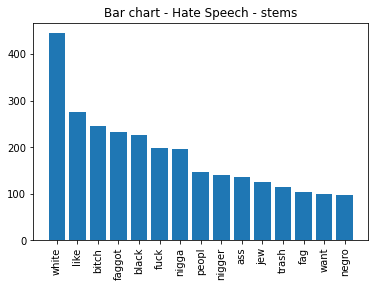

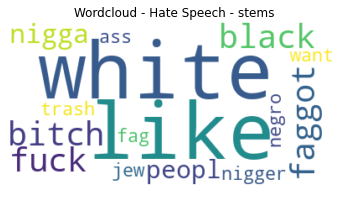

In [13]:
create_visualizations(hate_speech, "Hate Speech", n=15)

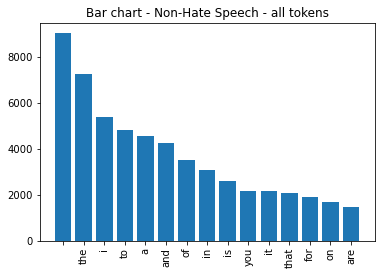

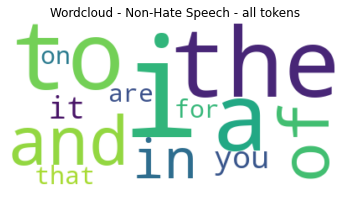

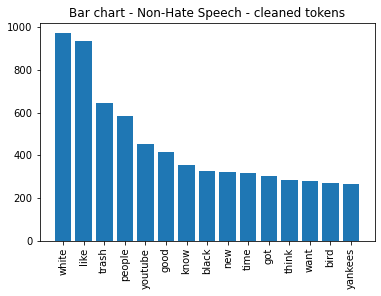

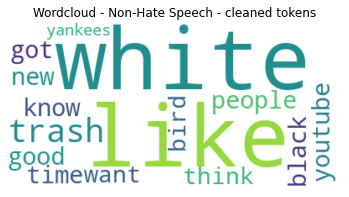

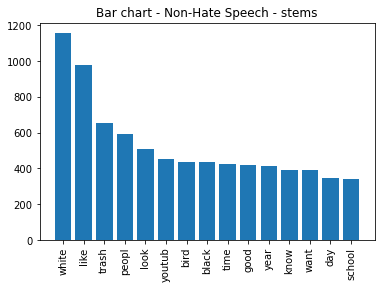

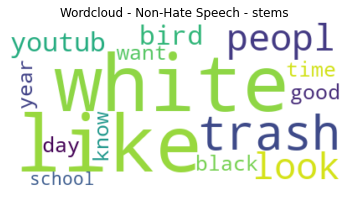

In [14]:
create_visualizations(non_hate_speech, "Non-Hate Speech", n=15)